In [1]:
!pip install yfinance 
!pip install pandas
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import yfinance as yf

In [3]:
feature_stocks = ['tsla', 'meta', 'goog', 'amzn', 'nflx', 'gbtc', 'gdx', 'intc', 'dal', 'c']
predict_stock = 'msft'

def get_stock_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            ticker_data = yf.Ticker(ticker).history(start=start_date, end=end_date)['Close']
            if ticker_data.isnull().any():
                print(f"Warning: Missing data found for {ticker}.")
            data[ticker] = ticker_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data.dropna()

#a) Define date ranges
start_train, end_train = '2023-01-01', '2024-06-30'
start_val, end_val = '2024-07-01', '2024-10-31'
start_test, end_test = '2024-11-01', '2024-12-31'

# Load data
X_train_df = get_stock_data(feature_stocks, start_train, end_train)
y_train_df = get_stock_data([predict_stock], start_train, end_train)

X_val_df = get_stock_data(feature_stocks, start_val, end_val)
y_val_df = get_stock_data([predict_stock], start_val, end_val)

X_test_df = get_stock_data(feature_stocks, start_test, end_test)
y_test_df = get_stock_data([predict_stock], start_test, end_test)

In [4]:
# Convert DataFrames to NumPy Arrays
X_train_raw = X_train_df.values.astype('float32')
y_train_raw = y_train_df.values.reshape(-1, 1).astype('float32')

X_val_raw = X_val_df.values.astype('float32')
y_val_raw = y_val_df.values.reshape(-1, 1).astype('float32')

X_test_raw = X_test_df.values.astype('float32')
y_test_raw = y_test_df.values.reshape(-1, 1).astype('float32')

In [5]:
# Scale Data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train_raw)
y_train = scaler_y.fit_transform(y_train_raw)

X_val = scaler_X.transform(X_val_raw)
y_val = scaler_y.transform(y_val_raw)

X_test = scaler_X.transform(X_test_raw)
y_test = scaler_y.transform(y_test_raw)

In [6]:
#b) Build Model (5-Layer, 20 Neurons Each, ReLU)
def build_model(input_size=10):
    model = keras.Sequential([
        keras.Input(shape=(input_size,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)  # single output for regression
    ])
    model.summary()
    return model

#c) Define Optimizers
optimizers_config = [
    ('SGD', keras.optimizers.SGD, {'learning_rate': 1e-6}),
    ('Momentum', keras.optimizers.SGD, {'learning_rate': 1e-6, 'momentum': 0.9}),
    ('Adam', keras.optimizers.Adam, {'learning_rate': 1e-6})
]





--- Model Training Started Using SGD Optimizer ---


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.0995 - mse: 1.0995 - val_loss: 2.1526 - val_mse: 2.1526
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1913 - mse: 1.1913 - val_loss: 2.1525 - val_mse: 2.1525
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0572 - mse: 1.0572 - val_loss: 2.1524 - val_mse: 2.1524
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1254 - mse: 1.1254 - val_loss: 2.1524 - val_mse: 2.1524
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1624 - mse: 1.1624 - val_loss: 2.1523 - val_mse: 2.1523
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1370 - mse: 1.1370 - val_loss: 2.1522 - val_mse: 2.1522
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0985 - mse: 1.0985 - val_loss: 2.1522 - val_mse: 2.1522
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0498 - mse: 1.0498 - val_loss: 2.1521 - val_mse: 2.1521
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.06

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.9939 - mse: 0.9939 - val_loss: 1.5486 - val_mse: 1.5486
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9679 - mse: 0.9679 - val_loss: 1.5485 - val_mse: 1.5485
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9821 - mse: 0.9821 - val_loss: 1.5484 - val_mse: 1.5484
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0287 - mse: 1.0287 - val_loss: 1.5484 - val_mse: 1.5484
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9752 - mse: 0.9752 - val_loss: 1.5483 - val_mse: 1.5483
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0190 - mse: 1.0190 - val_loss: 1.5483 - val_mse: 1.5483
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9825 - mse: 0.9825 - val_loss: 1.5482 - val_mse: 1.5482
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0282 - mse: 1.0282 - val_loss: 1.5482 - val_mse: 1.5482
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.97

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.8894 - mse: 0.8894 - val_loss: 1.5911 - val_mse: 1.5911
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9981 - mse: 0.9981 - val_loss: 1.5906 - val_mse: 1.5906
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9673 - mse: 0.9673 - val_loss: 1.5902 - val_mse: 1.5902
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9646 - mse: 0.9646 - val_loss: 1.5896 - val_mse: 1.5896
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9413 - mse: 0.9413 - val_loss: 1.5891 - val_mse: 1.5891
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9751 - mse: 0.9751 - val_loss: 1.5887 - val_mse: 1.5887
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9966 - mse: 0.9966 - val_loss: 1.5882 - val_mse: 1.5882
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0129 - mse: 1.0129 - val_loss: 1.5877 - val_mse: 1.5877
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.02

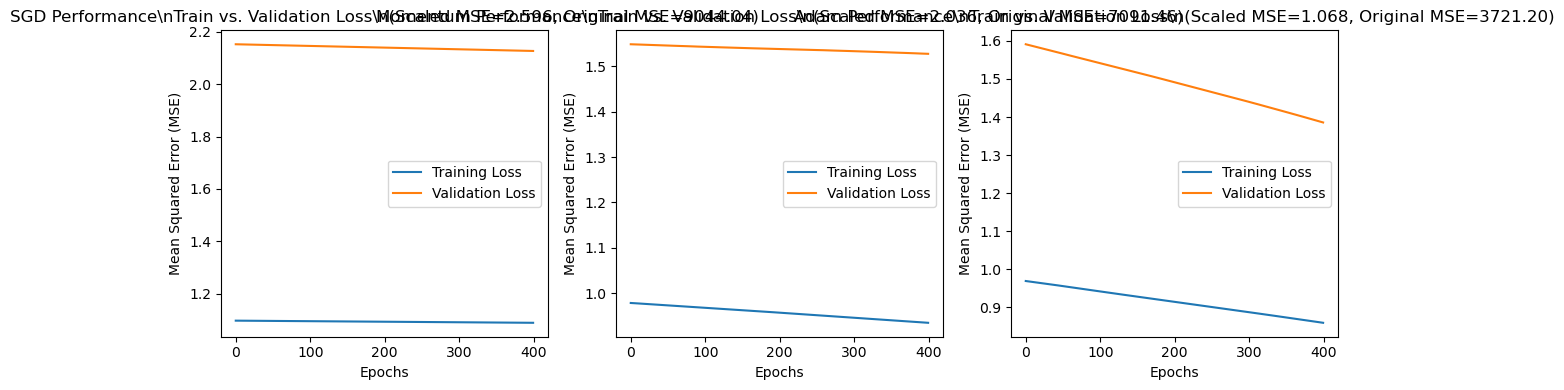


 Final Evaluation Summary 
SGD Optimizer: Final Test MSE (Original Scale) = 9044.04
Momentum Optimizer: Final Test MSE (Original Scale) = 7091.46
Adam Optimizer: Final Test MSE (Original Scale) = 3721.20


In [18]:
histories = {}
test_mses_scaled = {}
test_mses_original = {}

plt.figure(figsize=(12, 4))

y_std = scaler_y.scale_[0]
custom_input_size = X_train.shape[1]  # Match input size dynamically

for index, (opt_name, opt_class, opt_params) in enumerate(optimizers_config, start=1):
    print(f"\n--- Model Training Started Using {opt_name} Optimizer ---")

    # Recreate optimizer for each model instance to avoid variable mismatch errors
    optimizer_instance = opt_class(**opt_params)
    model = build_model(input_size=custom_input_size)
    model.compile(loss='mse', optimizer=optimizer_instance, metrics=['mse'])

    training_history = model.fit(
        X_train, y_train,
        epochs=400,
        validation_data=(X_val, y_val),
        verbose=1
    )

    histories[opt_name] = training_history

    train_loss_list = training_history.history['loss']
    val_loss_list = training_history.history['val_loss']
    for epoch_num, (train_loss_val, val_loss_val) in enumerate(zip(train_loss_list, val_loss_list), start=1):
        print(f"Epoch {epoch_num}: Train Loss = {train_loss_val:.4f} | Validation Loss = {val_loss_val:.4f}")

    mse_test_scaled = float(model.evaluate(X_test, y_test, verbose=0)[0])
    mse_test_original = mse_test_scaled * (y_std ** 2)

    test_mses_scaled[opt_name] = mse_test_scaled
    test_mses_original[opt_name] = mse_test_original

    print(f"Test MSE (scaled) with {opt_name}: {mse_test_scaled:.2f}")
    print(f"Test MSE (original) with {opt_name}: {mse_test_original:.2f}")

    plt.subplot(1, 3, index)
    plt.plot(train_loss_list, label='Training Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.title(
        f"{opt_name} Performance\\nTrain vs. Validation Loss\\n"
        f"(Scaled MSE={mse_test_scaled:.3f}, Original MSE={mse_test_original:.2f})"
    )
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()

plt.tight_layout()
plt.show()

print("\n Final Evaluation Summary ")
for opt_name in test_mses_original:
    print(f"{opt_name} Optimizer: Final Test MSE (Original Scale) = {test_mses_original[opt_name]:.2f}")
